## 1. 데이터 로드 및 구조 확인

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2. 기술통계량

In [2]:
describe_stats = iris.groupby('species')['petal_length'].describe()
print(describe_stats)
print(iris['species'].value_counts())

            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## 3. 시각화

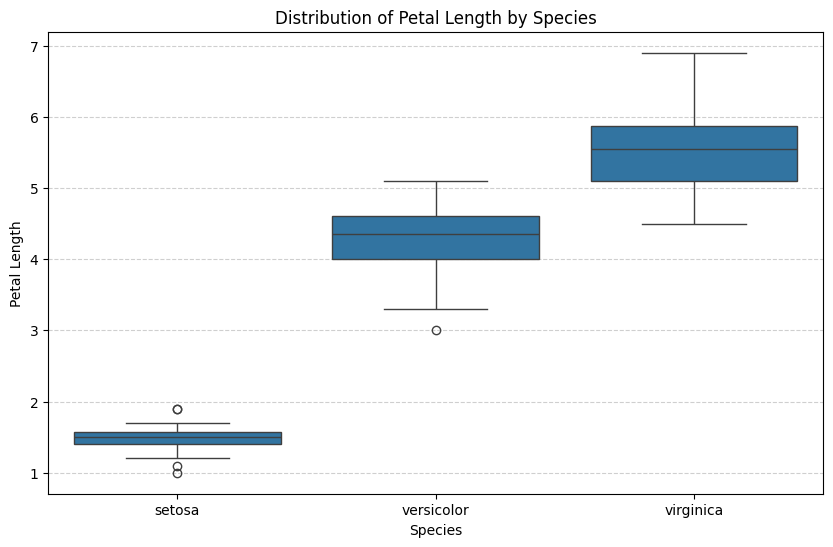

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.boxplot(x='species', y='petal_length', data=iris)

plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.title('Distribution of Petal Length by Species')
plt.ylabel('Petal Length')
plt.xlabel('Species')

plt.show()

## 4. 정규성 검정 (Shapiro-Wilk)
* H0 (귀무가설): group별 petal_length는 정규 분포를 따른다.
* H1 (대립가설): group별 petal_length는 정규 분포를 따르지 않는다.
* p-value = 0.05

In [4]:
from scipy import stats

# 종(Species) 목록 가져오기
species_list = iris['species'].unique()

print("Shapiro-Wilk 정규성 검정 결과")

for sp in species_list:
    data = iris[iris['species'] == sp]['petal_length']
    
    # Shapiro-Wilk 검정 수행
    stat, p_val = stats.shapiro(data)
    
    print(f"Species: {sp}")
    print(f" - Statistic: {stat:.4f}, p-value: {p_val:.4f}")
    
    # 0.05 기준 해석
    if p_val > 0.05:
        print("   => p-value > 0.05 이므로 귀무가설 채택 (정규성 만족 O)")
    else:
        print("   => p-value < 0.05 이므로 귀무가설 기각 (정규성 만족 X)")


Shapiro-Wilk 정규성 검정 결과
Species: setosa
 - Statistic: 0.9550, p-value: 0.0548
   => p-value > 0.05 이므로 귀무가설 채택 (정규성 만족 O)
Species: versicolor
 - Statistic: 0.9660, p-value: 0.1585
   => p-value > 0.05 이므로 귀무가설 채택 (정규성 만족 O)
Species: virginica
 - Statistic: 0.9622, p-value: 0.1098
   => p-value > 0.05 이므로 귀무가설 채택 (정규성 만족 O)


## 5. 등분산성 검정 (Levene)
* H0 (귀무가설): 세 group의 분산은 동일하다.
* H1 (대립가설): 세 group 중 적어도 한 group의 분산은 다르다. 

In [5]:
from scipy import stats

# 각 종별 데이터 나누기 (Setosa, Versicolor, Virginica)
group1 = iris[iris['species'] == 'setosa']['petal_length']
group2 = iris[iris['species'] == 'versicolor']['petal_length']
group3 = iris[iris['species'] == 'virginica']['petal_length']

# Levene 검정 수행
stat, p_val = stats.levene(group1, group2, group3)

print("Levene 등분산성 검정 결과")
print(f"Statistic: {stat:.4f}, p-value: {p_val:.10f}")

if p_val > 0.05:
    print("=> p-value > 0.05 이므로 귀무가설 채택 (등분산성 만족 O)")
else:
    print("=> p-value < 0.05 이므로 귀무가설 기각 (등분산성 만족 X)")

Levene 등분산성 검정 결과
Statistic: 19.4803, p-value: 0.0000000313
=> p-value < 0.05 이므로 귀무가설 기각 (등분산성 만족 X)


## 6. ANOVA 가설 수립
* H0 (귀무가설): 세 종(Species) 간의 Petal Length 평균은 모두 같다.
* H1 (대립가설): 적어도 한 그룹의 평균은 다른 그룹과 차이가 있다.

## 7 . One-way ANOVA

In [6]:
from scipy import stats

# 7. One-way ANOVA
f_val, p_val = stats.f_oneway(group1, group2, group3)

print("One-way ANOVA 결과")
print(f"F-value: {f_val:.4f}, p-value: {p_val:.4e}")

# 결과 해석 (유의수준 0.05 기준)
if p_val < 0.05:
    print("=> p-value < 0.05 이므로 귀무가설 기각")
else:
    print("=> p-value >= 0.05 이므로 귀무가설 채택")

One-way ANOVA 결과
F-value: 1180.1612, p-value: 2.8568e-91
=> p-value < 0.05 이므로 귀무가설 기각


## 8. 사후검정 (Tukey HSD)

In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(endog=iris['petal_length'], 
                          groups=iris['species'], 
                          alpha=0.05)

print("Tukey HSD 사후검정 결과")
print(tukey)

Tukey HSD 사후검정 결과
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


## 10. 회귀 분석

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 입력: sepal_length, sepal_width, petal_width
X = iris[['sepal_length', 'sepal_width', 'petal_width']]
# 정답(타겟): petal_length
y = iris['petal_length']

# Train, Test 데이터 분리 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("회귀 분석 성능 평가")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score (결정 계수): {r2:.4f}")

print("\n회귀 계수")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

회귀 분석 성능 평가
Mean Squared Error (MSE): 0.1300
R^2 Score (결정 계수): 0.9603

회귀 계수
sepal_length: 0.7228
sepal_width: -0.6358
petal_width: 1.4675
Intercept: -0.2622
